In [5]:
import pandas as pd
# import Quandl
import quandl

df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

print(df.head())

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [6]:
import pandas as pd
import quandl
import math



df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
print(df.head())

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  69.078238
2004-08-20   54.322689  0.710922    7.227007   22834300.0  67.839414
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  1.886792    1.183658    9188600.0  71.219849


In [7]:
import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out) #30 Days in advance i

df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

#features x
#labels y

X = np.array(df.drop(['label'],1))
y = np.array(df['label'])
X = preprocessing.scale(X)
y = np.array(df['label'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1) #THREAD LinearRegression (-1 is maximum ammount)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)

print(accuracy)


#30 Days in advanced it will be 98.4% accurate

35
0.9778011643877439


In [10]:
#Chaning type of Algorithm to svm.SVR

import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out) #30 Days in advance i

df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

#features x
#labels y

X = np.array(df.drop(['label'],1))
y = np.array(df['label'])
X = preprocessing.scale(X)
y = np.array(df['label'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = svm.SVR(gamma='auto') #Using different algorithm 
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)

print(accuracy)


#35 Days in advanced it will be 81.0% accurate


35


0.7785656547153678


35
[1078.20117125 1093.1869639  1107.17502697 1101.86085891 1095.33392164
 1092.6654737  1091.18318604 1088.18025165 1081.79569649 1077.36338974
 1075.19894137 1094.2889439  1112.70786705 1117.46569187 1132.50243424
 1136.49886207 1135.33817858 1132.76829514 1134.6368444  1152.72650867
 1151.65020929 1162.39611514 1158.86682943 1166.69156133 1186.53018662
 1199.35871468 1193.36028963 1205.64768398 1211.44990197 1208.89433631
 1199.66931145 1205.62100304 1204.0702872  1139.70689411 1084.86355302] 0.9759219401272261 35


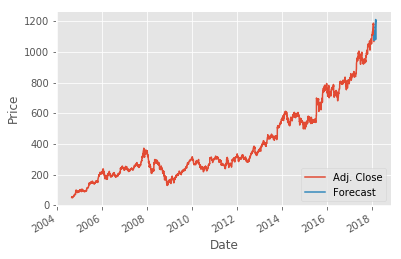

In [11]:
import pandas as pd
import quandl
import math
import numpy as np
import datetime
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')


df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out) #30 Days in advance i

df['label'] = df[forecast_col].shift(-forecast_out)


#features x
#labels y

X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label'])
y = np.array(df['label'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1) #THREAD LinearRegression (-1 is maximum ammount)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
# print(accuracy)

forecast_set = clf.predict(X_lately)

print(forecast_set, accuracy, forecast_out)

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
	next_date = datetime.datetime.fromtimestamp(next_unix)
	next_unix += one_day
	df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]


df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

35
[1077.49173449 1092.15834695 1106.06771996 1100.53925847 1094.02907513
 1091.41980752 1089.80548055 1086.74246409 1080.60320645 1076.24981166
 1073.93061359 1093.83574778 1112.23557344 1116.44566451 1131.41807497
 1135.39186022 1133.89840963 1131.49420515 1133.22791379 1151.98557042
 1150.93913917 1160.86677429 1157.41298867 1165.2729654  1185.88359288
 1198.02652888 1192.22623239 1204.19479842 1209.70296903 1207.92855334
 1198.6875586  1204.12381266 1202.94243579 1138.44085157 1085.46253433] 0.9790026776212282 35


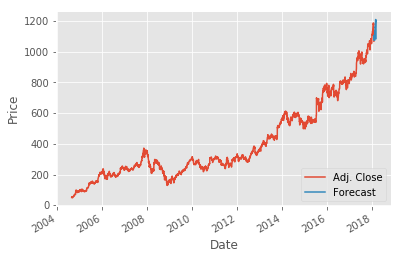

In [12]:
import pandas as pd
import quandl
import math
import numpy as np
import datetime
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use('ggplot')


df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100


df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out) #30 Days in advance i

df['label'] = df[forecast_col].shift(-forecast_out)


#features x
#labels y

X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1) #THREAD LinearRegression (-1 is maximum ammount)
clf.fit(X_train, y_train)


#pickle classifier after it has been trained
with open('linearregression.pickle', 'wb') as f:
	pickle.dump(clf, f)

pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

accuracy = clf.score(X_test,y_test)
# print(accuracy)
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
	next_date = datetime.datetime.fromtimestamp(next_unix)
	next_unix += one_day
	df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]


df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


0.42857142857142866 4.0


<function matplotlib.pyplot.show(*args, **kw)>

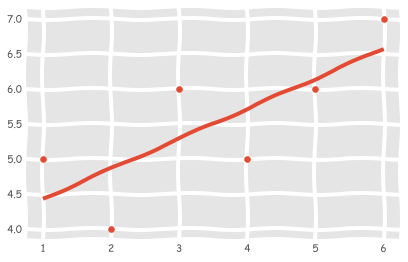

In [ ]:
#linear regression 
#y=mx+b


from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')



xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
	m = ( (mean(xs)*mean(ys)) - mean(xs*ys) ) / ( (mean(xs)**2) - mean(xs**2) )
	b = mean(ys)-m*mean(xs)
	return m, b



m, b= best_fit_slope_and_intercept(xs, ys)

print(m, b)

regression_line = [(m*x)+b  for x in xs]


predict_x = 8
predict_y = m*predict_x+b

plt.scatter(xs, ys)
plt.scatter(predict_x,  predict_y, color='g')
plt.plot(xs, regression_line)
plt.show()








